In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the tickers you want to retrieve data for
tickers = ["AAPL", "MSFT", "GOOGL", "NVDA", "TSLA", "META"]

# Download data for the specified tickers
data = yf.download(tickers, period="1y")

# Print the downloaded data
display(data)


[*********************100%***********************]  6 of 6 completed


Price                       Adj Close                                      \
Ticker                           AAPL       GOOGL        META        MSFT   
Date                                                                        
2023-10-02 00:00:00+00:00  172.865417  133.838593  305.898987  319.402527   
2023-10-03 00:00:00+00:00  171.522308  132.102890  300.036652  311.055237   
2023-10-04 00:00:00+00:00  172.775894  134.905960  304.662720  316.583710   
2023-10-05 00:00:00+00:00  174.019531  134.736374  303.875061  316.980713   
2023-10-06 00:00:00+00:00  176.586395  137.240158  314.483124  324.821899   
...                               ...         ...         ...         ...   
2024-09-25 00:00:00+00:00  226.369995  161.490005  568.309998  432.109985   
2024-09-26 00:00:00+00:00  227.520004  162.729996  567.840027  431.309998   
2024-09-27 00:00:00+00:00  227.789993  163.949997  567.359985  428.019989   
2024-09-30 00:00:00+00:00  233.000000  165.850006  572.440002  430.299988   
2024-10-01 00:00:00+00:00  225.985001  166.069901  575.859985  421.815002   

Price                                                   Close              \
Ticker                           NVDA        TSLA        AAPL       GOOGL   
Date                                                                        
2023-10-02 00:00:00+00:00   44.768456  251.600006  173.750000  134.169998   
2023-10-03 00:00:00+00:00   43.503834  246.529999  172.399994  132.429993   
2023-10-04 00:00:00+00:00   44.027679  261.160004  173.660004  135.240005   
2023-10-05 00:00:00+00:00   44.674484  260.049988  174.910004  135.070007   
2023-10-06 00:00:00+00:00   45.748158  260.529999  177.490005  137.580002   
...                               ...         ...         ...         ...   
2024-09-25 00:00:00+00:00  123.510002  257.019989  226.369995  161.490005   
2024-09-26 00:00:00+00:00  124.040001  254.220001  227.520004  162.729996   
2024-09-27 00:00:00+00:00  121.400002  260.459991  227.789993  163.949997   
2024-09-30 00:00:00+00:00  121.440002  261.630005  233.000000  165.850006   
2024-10-01 00:00:00+00:00  120.120003  256.336792  225.985001  166.069901   

Price                                              ...        Open  \
Ticker                           META        MSFT  ...        META   
Date                                               ...               
2023-10-02 00:00:00+00:00  306.820007  321.799988  ...  302.739990   
2023-10-03 00:00:00+00:00  300.940002  313.390015  ...  304.260010   
2023-10-04 00:00:00+00:00  305.579987  318.959991  ...  298.730011   
2023-10-05 00:00:00+00:00  304.790009  319.359985  ...  304.630005   
2023-10-06 00:00:00+00:00  315.429993  327.260010  ...  301.440002   
...                               ...         ...  ...         ...   
2024-09-25 00:00:00+00:00  568.309998  432.109985  ...  564.049988   
2024-09-26 00:00:00+00:00  567.840027  431.309998  ...  575.729980   
2024-09-27 00:00:00+00:00  567.359985  428.019989  ...  570.099976   
2024-09-30 00:00:00+00:00  572.440002  430.299988  ...  567.700012   
2024-10-01 00:00:00+00:00  575.859985  421.815002  ...  578.609985   

Price                                                            Volume  \
Ticker                           MSFT        NVDA        TSLA      AAPL   
Date                                                                      
2023-10-02 00:00:00+00:00  316.279999   44.029999  244.809998  52164500   
2023-10-03 00:00:00+00:00  320.829987   44.807999  248.610001  49594600   
2023-10-04 00:00:00+00:00  314.029999   43.742001  248.139999  53020300   
2023-10-05 00:00:00+00:00  319.089996   44.049999  260.000000  48527900   
2023-10-06 00:00:00+00:00  316.549988   44.193001  253.979996  57224100   
...                               ...         ...         ...       ...   
2024-09-25 00:00:00+00:00  429.829987  122.019997  252.539993  42308700   
2024-09-26 00:00:00+00:00  435.089996  126.800003  260.600006  36636700   
2024-09-27 00:00:00+00:00  431.51998

<Axes: xlabel='Date'>

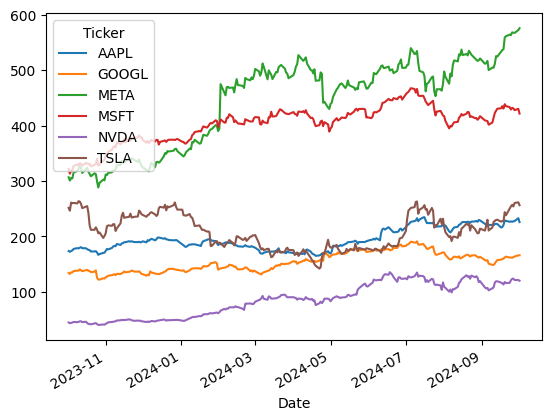

In [ ]:
data['Close'].plot()

<Axes: xlabel='Date'>

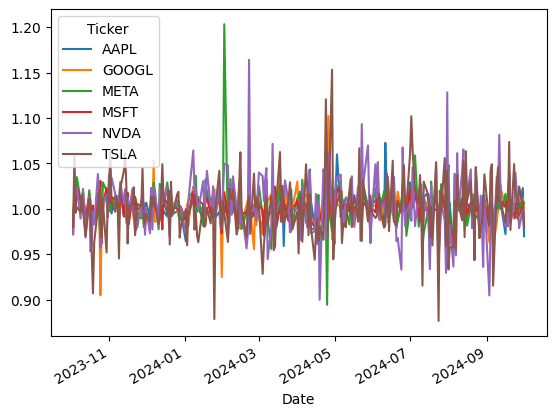

In [ ]:
(data['Close']/data['Close'].shift(1)).plot()

In [ ]:
pct_change = data['Close']/data['Close'].shift(1)
log_pct_change = pct_change.apply(np.log)
mean = log_pct_change.mean()
covariance = log_pct_change.cov()

sharpe_ratios = []
allocation_means = []
allocation_stds = []

allocations = np.random.random((len(mean), 10**len(tickers)))
allocations /= allocations.sum(axis=0)

max_sharpe_ratio = 0

for i in range(10**len(tickers)):
  allocation = allocations[:, i]

  allocation_mean, allocation_std = np.dot(mean, allocation), np.sqrt(np.dot(allocation.T, np.dot(covariance, allocation)))
  sharpe_ratio = allocation_mean / allocation_std
  if sharpe_ratio > max_sharpe_ratio:
    max_sharpe_ratio = sharpe_ratio
  sharpe_ratios.append(sharpe_ratio)
  allocation_means.append(allocation_mean)
  allocation_stds.append(allocation_std)

max_sharpe_ratio_index = np.argmax(sharpe_ratios)
best_mean = allocation_means[max_sharpe_ratio_index]
best_std = allocation_stds[max_sharpe_ratio_index]
best_allocation = allocations[:,max_sharpe_ratio_index]

print("Max Sharpe Ratio: ", max_sharpe_ratio, "Best Allocation: ", best_allocation)

Max Sharpe Ratio:  0.14048402564550969 Best Allocation:  [2.32297229e-01 2.55899271e-04 3.77724199e-01 2.04649702e-02
 3.65026886e-01 4.23081660e-03]


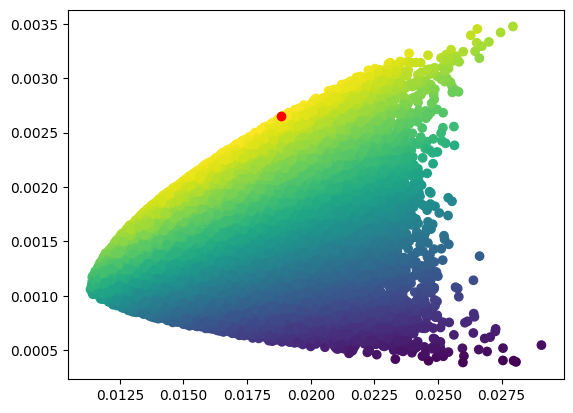

In [ ]:
plt.scatter(list(allocation_stds), list(allocation_means), c=list(sharpe_ratios))
plt.scatter(best_std, best_mean, c='r')
plt.show()